In [1]:
#loading the dataset
from sklearn.datasets import load_iris

data = load_iris()

X = data.data
y = data.target

In [8]:
import matplotlib
import seaborn as sns
sns.set()
matplotlib.rcParams['figure.dpi'] = 144

In [3]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.1, random_state=0)

#instantiating knn

knn = KNeighborsClassifier(n_neighbors = 2)

#constructing pipe

from sklearn.pipeline import Pipeline

pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('knn', knn)
])

pipe.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('knn',
                 KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                      metric='minkowski', metric_params=None,
                                      n_jobs=None, n_neighbors=2, p=2,
                                      weights='uniform'))],
         verbose=False)

In [6]:
params = {'knn__n_neighbors': range(1,36,1)}
grid = GridSearchCV(pipe, params, cv=20, n_jobs=4, iid=True)

grid.fit(X,y)

GridSearchCV(cv=20, error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('scaler',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('knn',
                                        KNeighborsClassifier(algorithm='auto',
                                                             leaf_size=30,
                                                             metric='minkowski',
                                                             metric_params=None,
                                                             n_jobs=None,
                                                             n_neighbors=2, p=2,
                                                             weights='uniform'))],
                                verbose=Fa

Text(0, 0.5, 'CV accuracy')

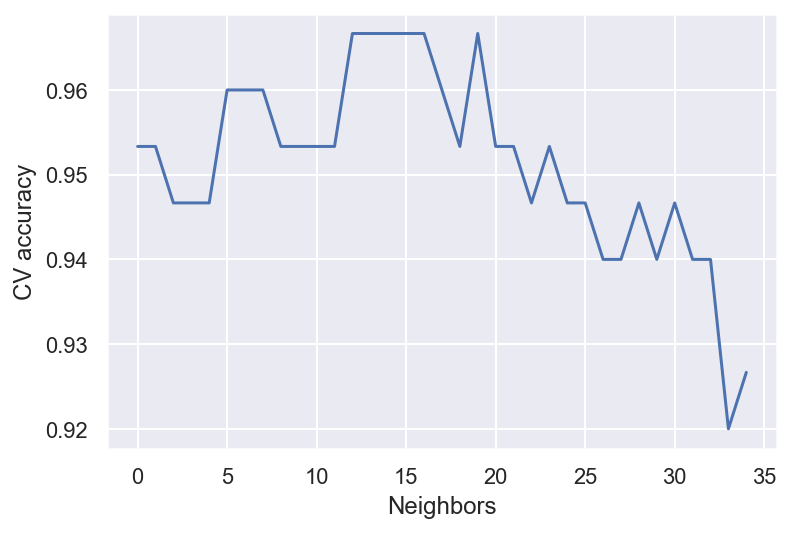

In [10]:
#visualizing

import matplotlib.pyplot as plt

plt.plot(grid.cv_results_['mean_test_score'])
plt.xlabel('Neighbors')
plt.ylabel('CV accuracy')